In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comp = pd.read_csv("cpugpu.csv")

In [3]:
comp.head()

Index    UserID gameRating desktopRating workRating                   CPU  \
0      0  36276693        96%           89%        76%     AMD Ryzen 3 3200G   
1      1  36276701       121%           91%       122%     AMD Ryzen 7 2700X   
2      2  36276704        12%           76%        12%  Intel Core i7-4910MQ   
3      3  36280154        24%           77%        19%   Intel Core i5-3470S   
4      4  36280160        36%           79%        29%    Intel Core i7-2600   

  CPURating                       GPU GPURating  
0    80.90%  Nvidia RTX 2060S (Super)   113.20%  
1       84%        Nvidia RTX 3060-Ti   139.80%  
2    79.80%      Nvidia Quadro K2100M     7.20%  
3    69.40%         Nvidia GTX 660-Ti       27%  
4    74.50%           Nvidia GTX 1650    45.70%

In [4]:
#Map GPU Type for each observation
def map_gpu_type(name):
    name = str(name)
    type = ''
    if "AMD" in name:
        type = "AMD"
    elif "Nvidia" in name:
        type = "Nvidia"
    elif "Intel" in name:
        type = "Intel"
    else:
        type = "Other"
    return type

def map_gpu_data(gpu_data):
    gpu_type = []
    for obs in gpu_data:
        obs_type = map_gpu_type(obs)
        gpu_type.append(obs_type)
    return gpu_type

def map_cpu_type(name):
    name = str(name)
    type = ''
    if "AMD" in name:
        type = "AMD"
    elif "Intel" in name:
        type = "Intel"
    else:
        type = "Other"
    return type

def map_cpu_data(cpu_data):
    cpu_type = []
    for obs in cpu_data:
        obs_type = map_cpu_type(obs)
        cpu_type.append(obs_type)
    return cpu_type

#Test

gpu = ["Nvidia", "Nvidia", "AMD", "Intel", "AMD", "meow"]
cpu = ["AMD Ryzen 9 3900", "Intel i7 9900k", "AMD", "Intel", "AMD", "AMD", "Intel"]
gpu_cat = map_gpu_data(gpu)
cpu_cat = map_cpu_data(cpu)
print(gpu_cat)
print(cpu_cat)

['Nvidia', 'Nvidia', 'AMD', 'Intel', 'AMD', 'Other']
['AMD', 'Intel', 'AMD', 'Intel', 'AMD', 'AMD', 'Intel']


In [5]:
comp["GPUType"] = map_gpu_data(comp["GPU"])

In [6]:
comp["CPUType"] = map_cpu_data(comp["CPU"])

In [7]:
comp.head()

Index    UserID gameRating desktopRating workRating                   CPU  \
0      0  36276693        96%           89%        76%     AMD Ryzen 3 3200G   
1      1  36276701       121%           91%       122%     AMD Ryzen 7 2700X   
2      2  36276704        12%           76%        12%  Intel Core i7-4910MQ   
3      3  36280154        24%           77%        19%   Intel Core i5-3470S   
4      4  36280160        36%           79%        29%    Intel Core i7-2600   

  CPURating                       GPU GPURating GPUType CPUType  
0    80.90%  Nvidia RTX 2060S (Super)   113.20%  Nvidia     AMD  
1       84%        Nvidia RTX 3060-Ti   139.80%  Nvidia     AMD  
2    79.80%      Nvidia Quadro K2100M     7.20%  Nvidia   Intel  
3    69.40%         Nvidia GTX 660-Ti       27%  Nvidia   Intel  
4    74.50%           Nvidia GTX 1650    45.70%  Nvidia   Intel

In [8]:
comp["gameRating"] = comp["gameRating"].str.rstrip("%").astype('float')

In [9]:
comp["desktopRating"] = comp["desktopRating"].str.rstrip("%").astype('float')

In [10]:
comp["workRating"] = comp["workRating"].str.rstrip("%").astype('float')

In [11]:
comp.dtypes

Index              int64
UserID             int64
gameRating       float64
desktopRating    float64
workRating       float64
CPU               object
CPURating         object
GPU               object
GPURating         object
GPUType           object
CPUType           object
dtype: object

In [12]:
comp["CPURating"] = comp["CPURating"].str.rstrip("%").astype('float')

In [13]:
comp["GPURating"] = comp["GPURating"].str.rstrip("%").astype('float')

In [14]:
comp.head()

Index    UserID  gameRating  desktopRating  workRating  \
0      0  36276693        96.0           89.0        76.0   
1      1  36276701       121.0           91.0       122.0   
2      2  36276704        12.0           76.0        12.0   
3      3  36280154        24.0           77.0        19.0   
4      4  36280160        36.0           79.0        29.0   

                    CPU  CPURating                       GPU  GPURating  \
0     AMD Ryzen 3 3200G       80.9  Nvidia RTX 2060S (Super)      113.2   
1     AMD Ryzen 7 2700X       84.0        Nvidia RTX 3060-Ti      139.8   
2  Intel Core i7-4910MQ       79.8      Nvidia Quadro K2100M        7.2   
3   Intel Core i5-3470S       69.4         Nvidia GTX 660-Ti       27.0   
4    Intel Core i7-2600       74.5           Nvidia GTX 1650       45.7   

  GPUType CPUType  
0  Nvidia     AMD  
1  Nvidia     AMD  
2  Nvidia   Intel  
3  Nvidia   Intel  
4  Nvidia   Intel

In [15]:
comp.dtypes

Index              int64
UserID             int64
gameRating       float64
desktopRating    float64
workRating       float64
CPU               object
CPURating        float64
GPU               object
GPURating        float64
GPUType           object
CPUType           object
dtype: object

In [16]:
AMD = pd.read_csv("AMD.csv")

In [17]:
AMD.head()

Index               Model                 Family  \
0      0   AMD Ryzen 9 5950X  AMD Ryzen™ Processors   
1      1   AMD Ryzen 9 5900X  AMD Ryzen™ Processors   
2      2   AMD Ryzen 7 5800X  AMD Ryzen™ Processors   
3      3   AMD Ryzen 5 5600X  AMD Ryzen™ Processors   
4      4  AMD Ryzen 9 3900XT  AMD Ryzen™ Processors   

                              Line         Platform       OPN Tray  \
0  AMD Ryzen™ 9 Desktop Processors  Boxed Processor  100-000000059   
1  AMD Ryzen™ 9 Desktop Processors  Boxed Processor  100-000000061   
2  AMD Ryzen™ 7 Desktop Processors  Boxed Processor  100-000000063   
3  AMD Ryzen™ 5 Desktop Processors  Boxed Processor  100-000000065   
4  AMD Ryzen™ 9 Desktop Processors  Boxed Processor            NaN   

            OPN PIB           OPN MPK Launch Date  # of CPU Cores  ...  \
0  100-100000059WOF               NaN   11/5/2020            16.0  ...   
1  100-100000061WOF               NaN   11/5/2020            12.0  ...   
2  100-100000063WOF               NaN   11/5/2020             8.0  ...   
3  100-100000065BOX  100-100000065MPK   11/5/2020             6.0  ...   
4  100-100000277WOF               NaN      7/2020            12.0  ...   

   System Memory Specification  System Memory Type Memory Channels  \
0                Up to 3200MHz                DDR4             NaN   
1                Up to 3200MHz                DDR4             NaN   
2                Up to 3200MHz                DDR4             NaN   
3                Up to 3200MHz                DDR4             NaN   
4                Up to 3200MHz                DDR4             NaN   

  Graphics Frequency GPU Base                   Graphics Model  \
0                NaN      NaN  Discrete Graphics Card Required   
1                NaN      NaN  Discrete Graphics Card Required   
2                NaN      NaN  Discrete Graphics Card Required   
3                NaN      NaN  Discrete Graphics Card Required   
4                NaN      NaN  Discrete Graphics Card Required   

  Graphics Core Count                             Supported Technologies  \
0                 NaN  AMD "Zen 3" Core Architecture, AMD StoreMI Tec...   
1                 NaN  AMD "Zen 3" Core Architecture, AMD StoreMI Tec...   
2                 NaN  AMD "Zen 3" Core Architecture, AMD StoreMI Tec...   
3                 NaN  AMD "Zen 3" Core Architecture, AMD StoreMI Tec...   
4                 NaN  AMD StoreMI Technology, AMD Ryzen™ Master Utility   

  DisplayPort HDMI  
0         NaN  NaN  
1         NaN  NaN  
2         NaN  NaN  
3         NaN  NaN  
4         NaN  NaN  

[5 rows x 39 columns]

In [52]:
hm_data = comp[comp["CPU"].str.contains("Ryzen 5")]
hm_data = hm_data.pivot_table(columns = "CPU", index="GPU", values = "gameRating" )
hm_data.round(0)

CPU                                AMD Ryzen 5 1400  AMD Ryzen 5 1500X  \
GPU                                                                      
AMD R7 240                                      NaN                NaN   
AMD R7 265                                      NaN                NaN   
AMD RX 470                                      NaN                NaN   
AMD RX 480                                      NaN                NaN   
AMD RX 560                                      NaN                NaN   
AMD RX 5600-XT                                  NaN                NaN   
AMD RX 570                                      NaN                NaN   
AMD RX 5700-XT                                  NaN                NaN   
AMD RX 580                                      NaN                NaN   
AMD RX 590                                      NaN                NaN   
AMD RX Vega 8 (Ryzen iGPU)                      NaN                NaN   
AMD Radeon Graphics                             NaN                NaN   
AMD Radeon RX Vega 11 Graphics                  NaN                NaN   
AMD Radeon Vega 8 Graphics                      NaN                NaN   
Asus Radeon RX 570                              NaN                NaN   
Nvidia GTX 1050-Ti                              NaN               24.0   
Nvidia GTX 1060-3GB                             NaN                NaN   
Nvidia GTX 1060-6GB                             NaN                NaN   
Nvidia GTX 1070                                 NaN                NaN   
Nvidia GTX 1070-Ti                              NaN                NaN   
Nvidia GTX 1080                                 NaN               58.0   
Nvidia GTX 1080-Ti                              NaN                NaN   
Nvidia GTX 1650                                 NaN                NaN   
Nvidia GTX 1650S (Super)                        NaN                NaN   
Nvidia GTX 1660                                 NaN                NaN   
Nvidia GTX 1660-Ti                              NaN                NaN   
Nvidia GTX 1660-Ti (Mobile Max-Q)               NaN                NaN   
Nvidia GTX 1660S (Super)                        NaN                NaN   
Nvidia GTX 750-Ti                               NaN                NaN   
Nvidia GTX 760                                  NaN                NaN   
Nvidia GTX 960                                  NaN                NaN   
Nvidia GTX 980-Ti                               NaN                NaN   
Nvidia GeForce GTX 1050                         NaN                NaN   
Nvidia GeForce GTX 1650                         NaN                NaN   
Nvidia RTX 2060                                 NaN                NaN   
Nvidia RTX 2060S (Super)                        NaN                NaN   
Nvidia RTX 2070                                 NaN                NaN   
Nvidia RTX 2070S (Super)                       73.0                NaN   
Nvidia RTX 2080                                 NaN                NaN   
Nvidia RTX 3060-Ti                              NaN                NaN   
Nvidia RTX 3070                                 NaN                NaN   
Nvidia RTX 3080                                 NaN                NaN   

CPU                                AMD Ryzen 5 1600  AMD Ryzen 5 1600AF  \
GPU                                                                       
AMD R7 240                                      NaN                 NaN   
AMD R7 265                                      NaN                 NaN   
AMD RX 470                                      NaN                 NaN   
AMD RX 480                                     39.0                 NaN   
AMD RX 560                                     23.0                 NaN   
AMD RX 5600-XT                                 76.0                 NaN   
AMD RX 570                                     48.0                 NaN   
AMD RX 5700-XT                                  NaN                 

In [53]:
hm_data.head()

CPU         AMD Ryzen 5 1400  AMD Ryzen 5 1500X  AMD Ryzen 5 1600  \
GPU                                                                 
AMD R7 240               NaN                NaN               NaN   
AMD R7 265               NaN                NaN               NaN   
AMD RX 470               NaN                NaN               NaN   
AMD RX 480               NaN                NaN              39.0   
AMD RX 560               NaN                NaN              23.0   

CPU         AMD Ryzen 5 1600AF  AMD Ryzen 5 1600X  AMD Ryzen 5 2400G  \
GPU                                                                    
AMD R7 240                 NaN                NaN                NaN   
AMD R7 265                 NaN                NaN                NaN   
AMD RX 470                 NaN                NaN                NaN   
AMD RX 480                 NaN                NaN                NaN   
AMD RX 560                 NaN                NaN                NaN   

CPU         AMD Ryzen 5 2500U  AMD Ryzen 5 2600  AMD Ryzen 5 2600X  \
GPU                                                                  
AMD R7 240                NaN              13.0                NaN   
AMD R7 265                NaN               NaN                NaN   
AMD RX 470                NaN               NaN                NaN   
AMD RX 480                NaN               NaN                NaN   
AMD RX 560                NaN               NaN                NaN   

CPU         AMD Ryzen 5 3400G  AMD Ryzen 5 3400GE Vega Graphics  \
GPU                                                               
AMD R7 240                NaN                               NaN   
AMD R7 265                NaN                               NaN   
AMD RX 470                NaN                               NaN   
AMD RX 480                NaN                               NaN   
AMD RX 560                NaN                               NaN   

CPU         AMD Ryzen 5 3500U  AMD Ryzen 5 3500X  AMD Ryzen 5 3550H  \
GPU                                                                   
AMD R7 240                NaN                NaN                NaN   
AMD R7 265                NaN                NaN                NaN   
AMD RX 470                NaN                NaN                NaN   
AMD RX 480                NaN                NaN                NaN   
AMD RX 560                NaN                NaN                NaN   

CPU         AMD Ryzen 5 3600  AMD Ryzen 5 3600X  AMD Ryzen 5 3600XT  \
GPU                                                                   
AMD R7 240               NaN                NaN                 NaN   
AMD R7 265               NaN               27.0                 NaN   
AMD RX 470               NaN                NaN                 NaN   
AMD RX 480               NaN                NaN                 NaN   
AMD RX 560               NaN                NaN                 NaN   

CPU         AMD Ryzen 5 4500U  AMD Ryzen 5 4600H  AMD Ryzen 5 5600X  
GPU                                                                  
AMD R7 240                NaN                NaN                NaN  
AMD R7 265                NaN                NaN                NaN  
AMD RX 470                NaN                NaN               55.0  
AMD RX 480                NaN                NaN                NaN  
AMD RX 560                NaN                NaN                NaN

In [54]:
import seaborn as sns; sns.set_theme()

In [55]:
sns.set(font_scale = 10)

In [74]:
import matplotlib

fig, ax = plt.subplots(figsize = (200,200))        # Sample figsize in inches
sns.heatmap(hm_data, annot=True, linewidths= 20, ax=ax, fmt=".0f")

<AxesSubplot:xlabel='CPU', ylabel='GPU'>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
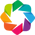

KeyError: 'CPU'

In [83]:
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
from bokeh.plotting import figure
from bokeh.palettes import BuPu
import holoviews as hv #There is a reason we have to do this here but its not important. Holoviews is the next library
hv.extension('bokeh')

import numpy as np

import matplotlib as mpl

from matplotlib import cm as cm

# Bokeh doesn't have its own gradient color maps supported but you can easily use on from matplotlib.
colormap =cm.get_cmap("viridis", 256)
bokehpalette = [mpl.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]


#this mapper is what transposes a numerical value to a color. 
mapper = LinearColorMapper(palette=bokehpalette)

#ColumnDataSource is bokeh fancy shared datasource. Not applicable here but it would generally allow the sharing of one data source
#with multiple charts. 
source = hm_data

z = figure(title="Heatmap of Flight Density from 1949 to 1961", x_range=hm_data["CPU"], y_range=hm_data["GPU"]
           , toolbar_location='below', toolbar_sticky=False)

z.rect(x='CPU', y='GPU', width=20, height=20, source=source
       , fill_color={'field': "gameRating", 'transform': mapper}, line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=8),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
z.add_layout(color_bar, 'right')
z.xaxis.axis_label = 'Years'
z.yaxis.axis_label = 'Months'


show(z)